In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [229]:
df = pd.read_csv("Week7_train .csv")
df_test = pd.read_csv("Week7_test.csv")

In [230]:
df.shape

(42000, 785)

In [231]:
df_test.shape

(28000, 784)

In [232]:
df_sample = df.sample(frac=0.1, random_state=42)  # random_state ensures reproducibility

# Save the sampled data (optional)
df_sample.to_csv("sampled_data.csv", index=False)

In [233]:
df_sample.shape

(4200, 785)

In [ ]:
df_sample.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
unique_classes = set(df['label'])
print(f"Unique class labels: {unique_classes}")
print(f"Number of unique class labels: {len(unique_classes)}")


Unique class labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of unique class labels: 10


In [236]:
# Count the number of examples for each class
class_counts = df['label'].value_counts()

# Print the results
print(class_counts)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [237]:
X = df_sample.drop(columns=['label'])
#X = df_sample.iloc[:,1:]
y = df_sample['label']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (4200, 784)
Shape of y: (4200,)


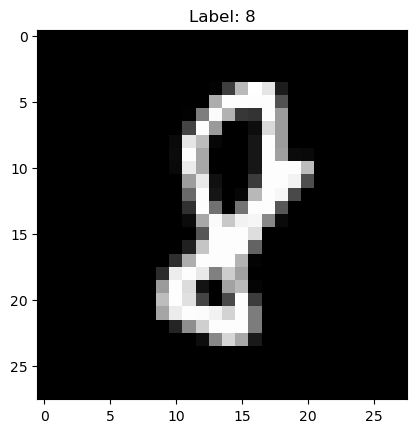

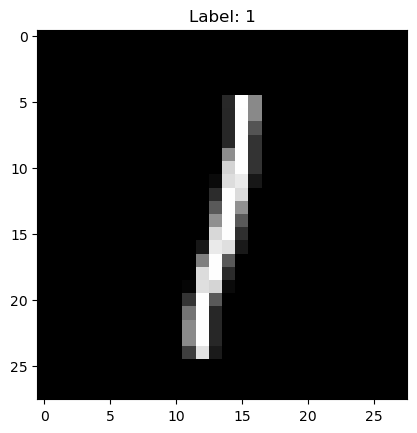

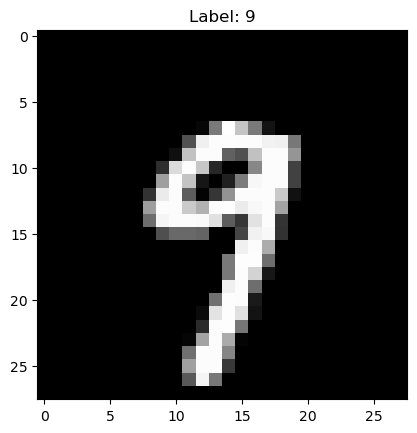

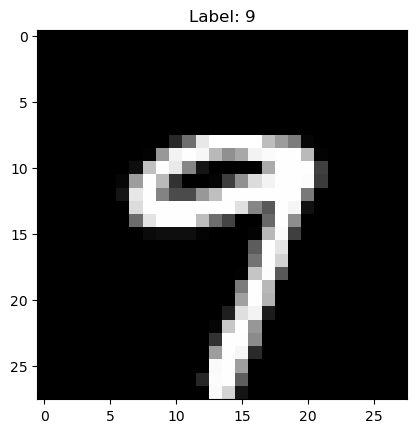

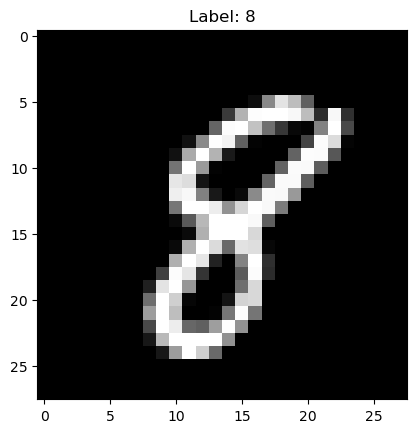

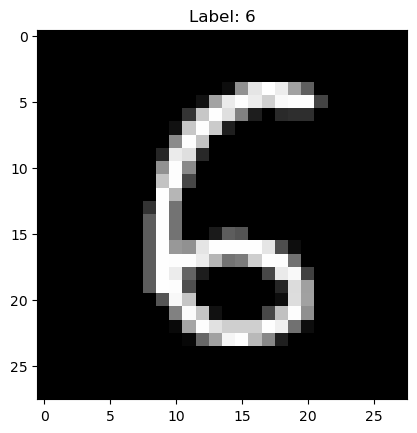

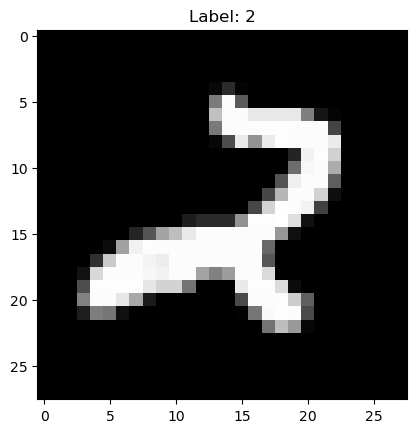

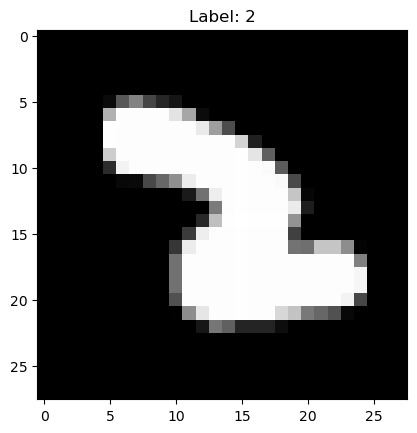

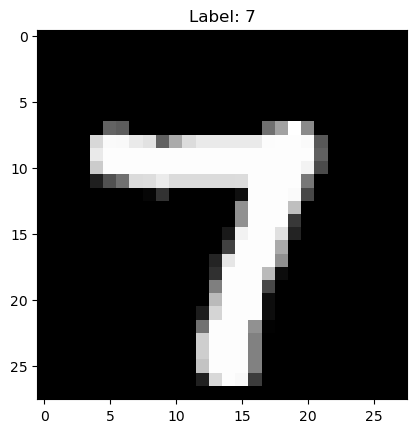

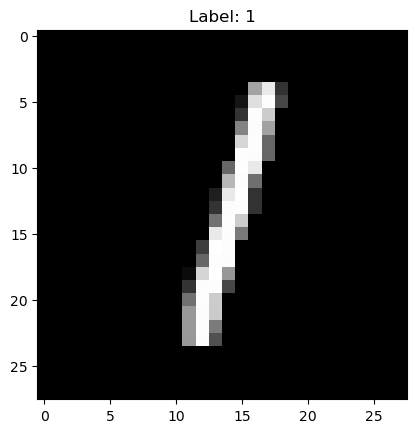

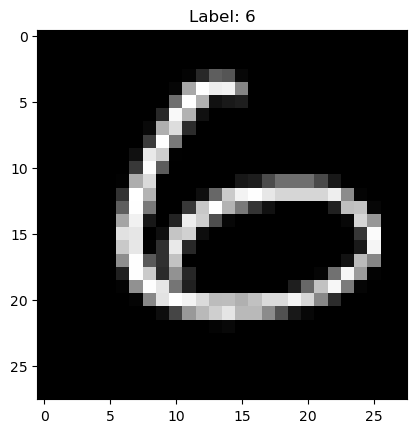

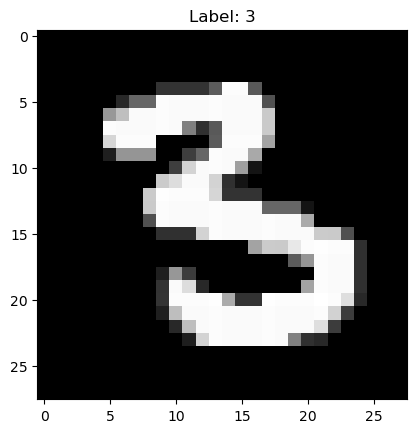

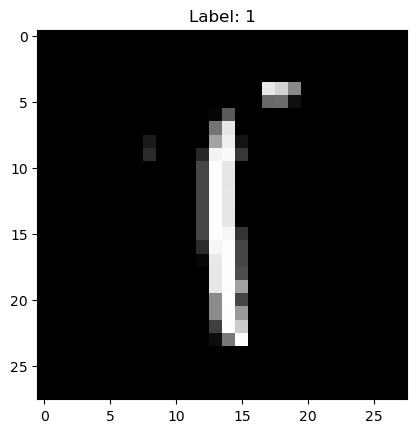

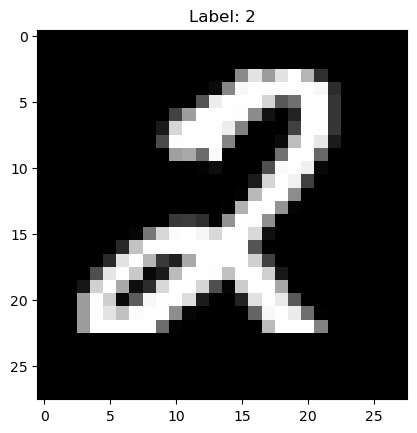

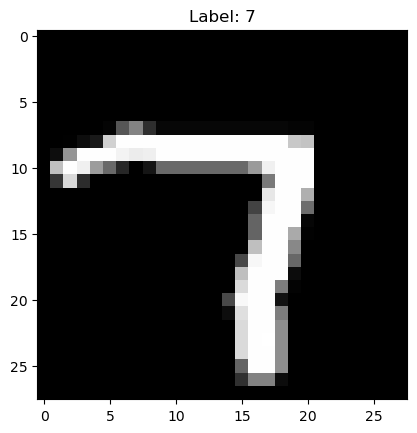

In [238]:
# Reshape and visualize first 5 images (if image data is flattened)
for i in range(15):
    image = X.iloc[i].values.reshape(28, 28)  # Adjust dimensions if needed
    plt.imshow(image, cmap='grey')
    plt.title(f"Label: {y.iloc[i]}")
    plt.show()


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_test.shape}")

Training set size: (3150, 784)
Validation set size: (1050, 784)


In [251]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [261]:
print("Missing values in training data:")
print(X_train.isnull().sum())

print("\nMissing values in testing data:")
print(X_test.isnull().sum())

Missing values in training data:
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

Missing values in testing data:
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64


In [253]:
print(knn)


KNeighborsClassifier()


In [255]:
y_pred = knn.predict(X_test)


In [257]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [259]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050

Accuracy Score: 0.9247619047619048


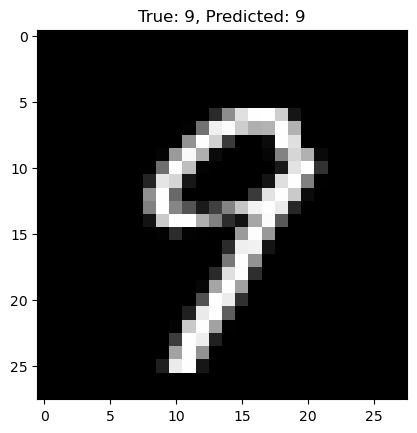

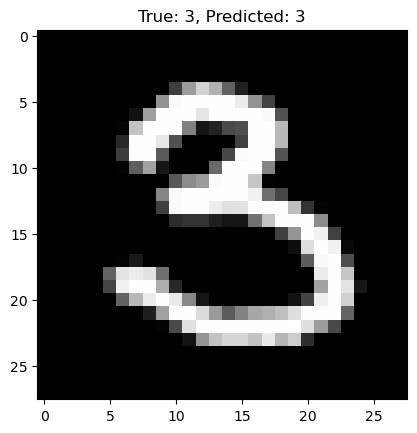

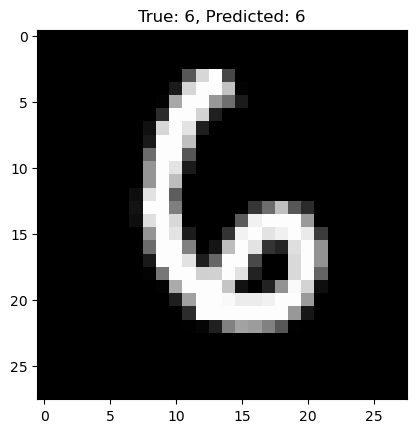

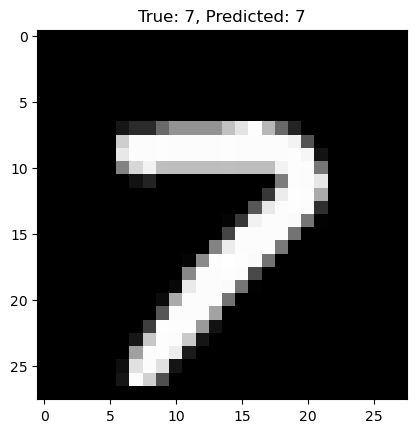

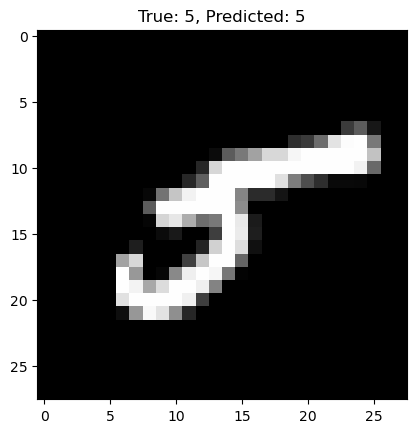

In [185]:
for i in range(5):
    image = X_test.iloc[i].values.reshape(28, 28)  # Adjust dimensions if needed
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    plt.show()
